### Overview of Dataset

In [3]:
# import pre-requisite libraries
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For creating static visualizations
import seaborn as sns           # For statistical data visualization, built on top of Matplotlib

# Load the dataset from a CSV file into a DataFrame
spotify = pd.read_csv("spotify-2023.csv", encoding = "ISO-8859-1")

# Configure pandas display options to show all columns and rows when printing the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the number of columns and rows in the dataset
print(f"Columns: {len(spotify.columns)}")
print(f"Rows: {len(spotify)}")

# Create a DataFrame to display the data types of each column in the dataset
dtypes = pd.DataFrame(spotify.dtypes)
dtypes.rename(columns={0: "Data type"})

Columns: 24
Rows: 953


,Data type
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


### Basic Descriptive Statistics

In [5]:
# Create a new DataFrame by reading the Spotify dataset again for experimental purposes
spotifyc = pd.read_csv("spotify-2023.csv", encoding = "ISO-8859-1")

# Convert the 'streams' column to numeric values, setting non-numeric values to NaN
# 'errors="coerce"' converts any invalid parsing (non-numeric values) to NaN
spotifyc['streams'] = pd.to_numeric(spotifyc['streams'], errors = 'coerce')

# Get basic statistics (mean, median, and standard deviation) of the 'streams' column in a single line:
# - Uses describe() to get a summary of statistics for the 'streams' column.
# - Uses loc[] to select only "mean", "50%" (median), and "std" (standard deviation).
# - Uses apply() to format the output to 5 decimal places, avoiding scientific notation.
# - Uses rename() to rename "50%" to "median" for clearer understanding.
spotifyc['streams'].describe().loc[["mean","50%","std"]].apply("{0:.5f}".format).rename(index={'50%': 'median'})

mean      514137424.93908
median    290530915.00000
std       566856949.03888
Name: streams, dtype: object

In [6]:
# Defines a function named outliers with df as its parameter
def outliers(df):
    # Calculate the 1st quartile (Q1) and 3rd quartile (Q3) of the data
    q1, q3 = np.percentile(df, [25,75])

    # Compute the Interquartile Range (IQR) as the difference between Q3 and Q1
    iqr = q3 - q1

    # Identify outliers:
    # Values less than (Q1 - 1.5 * IQR) are considered lower outliers
    # Values greater than (Q3 + 1.5 * IQR) are considered upper outliers
    outliers = df[((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr)))]

    # returns outliers
    return outliers

In [7]:

def bas_des_st(df,name,x,y,figsizex,figsizey,width = 0.2):
    # Identify outliers in the specified column using the outliers() function
    out = outliers(df[name])

    # Convert the outliers into a DataFrame for easy plotting
    out_df = pd.DataFrame(out)

    # Generate automatic bin edges for the histogram based on the data
    bin = plt.hist(df[name],bins = 'auto')[1]

    # Close the plot to avoid displaying the histogram at this step
    plt.close()

    # Print basic information about the outliers
    print("Total # of freq. of outliers: "+ str(len(out)))                   # Number of outliers
    print("max outlier value: "+ str(out.max()))                             # Maximum outlier value
    print("min outlier value: "+ str(out.min()))                             # Minimum outlier value
    print("Outlier ranges from " + str(out.min()) + " to " + str(out.max())) # Outlier range

    # Create subplots with specified layout and figure size
    f,a = plt.subplots(x,y,figsize = (figsizex,figsizey))

    # Plot the histogram for the main data (without outliers highlighted)
    a[0].hist(df[name], bins = bin,color = 'cornflowerblue',width = width)
    a[0].set_ylabel('Frequency')
    a[0].set_title(f'{name} distribution')

    # Plot the histogram with outliers overlaid in a different color
    a[1].hist(df[name],label = f'{name} distribution', bins = bin,color = 'cornflowerblue',width = width)
    a[1].hist(out_df, label = 'Outliers', bins = bin, color = 'Orange',width = width)
    a[1].set_title('w/ Outliers overlayed')
    a[1].set_ylabel('Frequency')
    a[1].legend()

    # Set a common x-axis label for the entire figure
    f.supxlabel(name, fontsize = 25, y = 0.0005)

    # Display the plot
    plt.show()

Total # of freq. of outliers: 27
max outlier value: 8
min outlier value: 4
Outlier ranges from 4 to 8


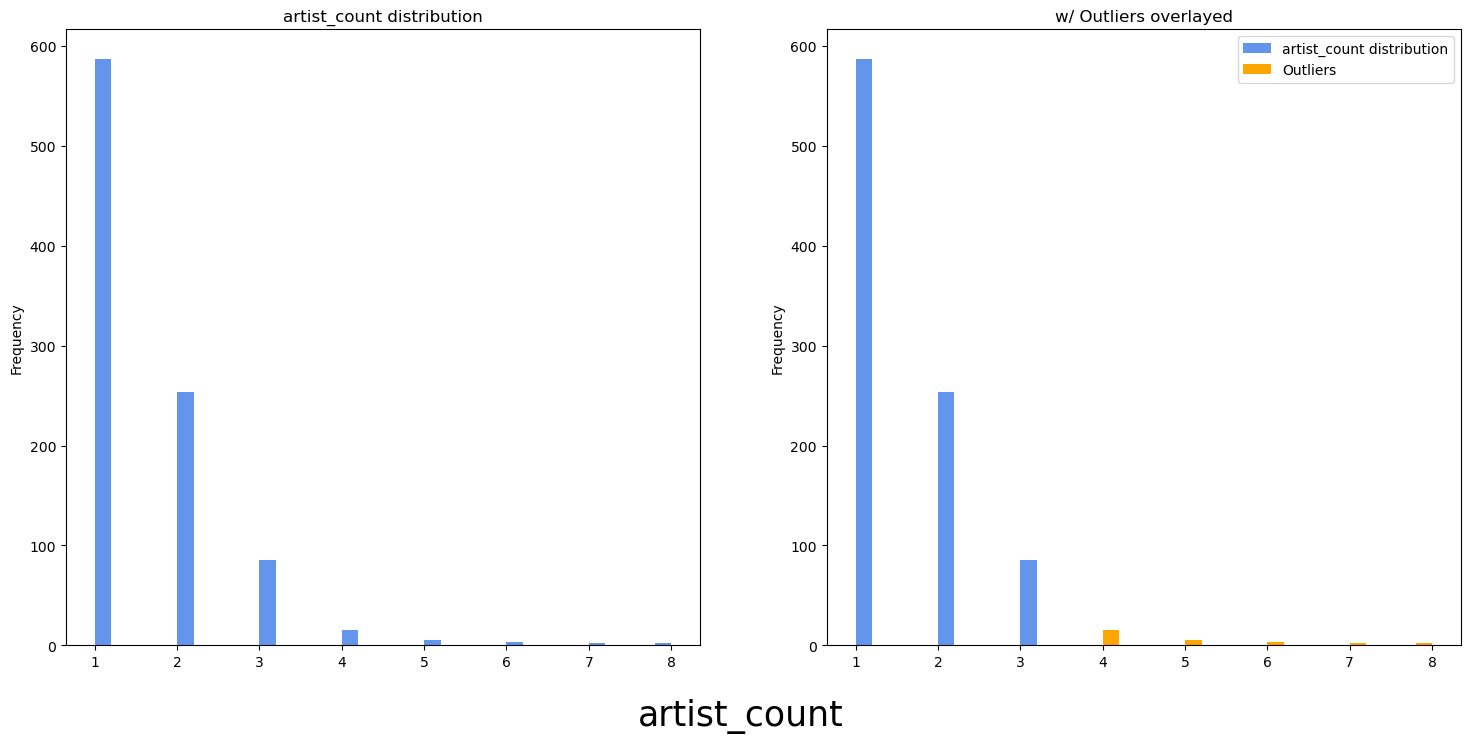

In [8]:
# Generate descriptive statistics and plot histograms for the 'artist_count' column
# - Uses a grid layout of 1 row and 2 columns, with a figure size of (18, 8).
bas_des_st(spotify,'artist_count', 1, 2, 18, 8)

Total # of freq. of outliers: 151
max outlier value: 2016
min outlier value: 1930
Outlier ranges from 1930 to 2016


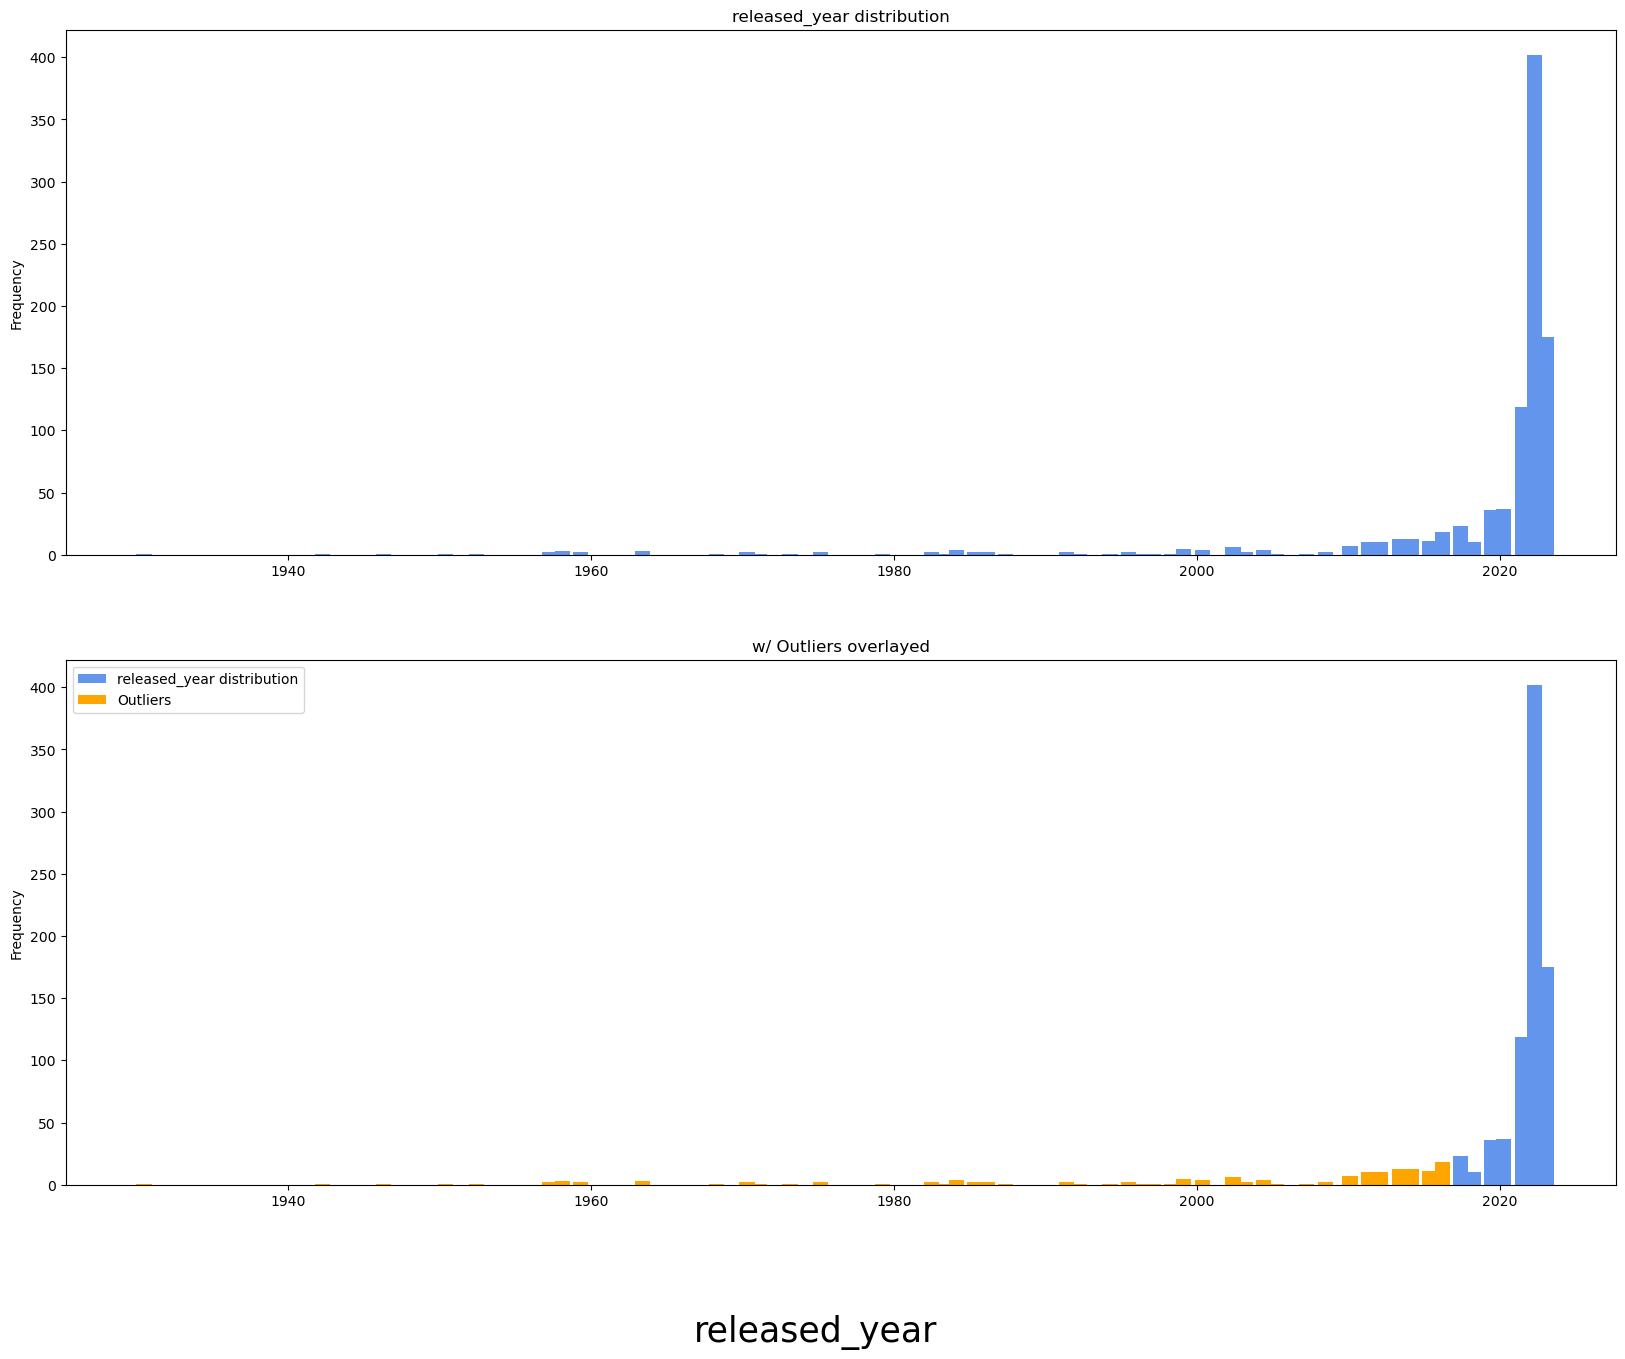

In [9]:
bas_des_st(spotify,'released_year', 2, 1, 20, 15, 1)

### Top Performers

In [11]:
# Get the top 5 rows with the highest 'streams' values
top5streams = spotifyc.nlargest(5, 'streams')
top5streams

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,125,"1,800",0,NaN,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,167,"3,595",6,NaN,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5


In [12]:
# Uses value_counts() function as a frequency count for the artist with the most released tracks
top5artist = spotify['artist(s)_name'].value_counts()[:5]

# Stores the top5artist variable into a DataFrame and then uses reset_index() to remove the artist(s)_name from the index and seperate it independently via a column
t5adf = pd.DataFrame(top5artist).reset_index()

# renames the first column and second column for better readability
t5adf.rename(columns={"artist(s)_name":"Artist Name","count": "Tracks released"})

,Artist Name,Tracks released
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


### Temporal Trends
##### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

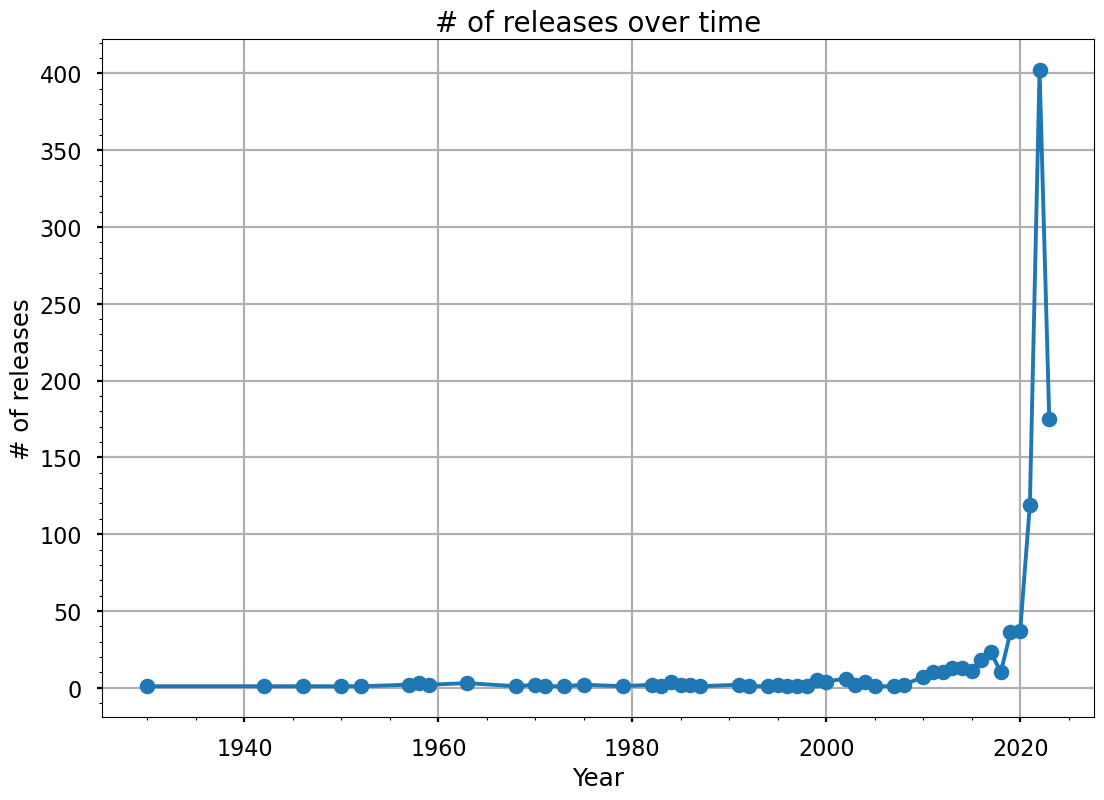

In [160]:
def temptrends(df, date):
    
    # Create a DataFrame with frequency counts of the release year
    dt = pd.DataFrame(df[date].value_counts())
    
    # Reset the index to move the year into a separate column and sort years in descending order
    dt1 = dt.reset_index().sort_values(by = [date], ascending = False)
    
    # Extract sorted years and release counts into lists
    dtsorted = dt1.iloc[:, 0].to_list()
    nrel_sorted = dt1.iloc[:, 1].to_list()

    return dtsorted, nrel_sorted
    
# Run the temptrends function on the 'released_year' column    
yrs, release = temptrends(spotify,"released_year")


# Plotting the data for # of releases over time
plt.xlabel("Year")                     # Label the x-axis as "Year"
plt.ylabel("# of releases")             # Label the y-axis as "# of releases"
plt.plot(yrs, release, "-o")            # Plot the number of tracks released over time with a line and markers
plt.style.use('seaborn-v0_8-poster')    # Use a clean style for better readability and aesthetics
plt.title('# of releases over time', fontsize=20)  # Add a title to the plot
plt.minorticks_on()                     # Enable minor ticks on both axes for precision
plt.grid()                              # Display a grid for easier data interpretation
plt.show()

##### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

In [154]:
def line_val(x_data, y_data):
    max_y_val = max(y_data)              # Get the maximum y-value
    max_index = y_data.index(max_y_val)  # Find the index of the maximum y-value
    max_x_val = x_data[max_index]        # Get the corresponding x-value for the max y-value
    
    # Add legend to indicate the month with the highest release count
    plt.legend([f'{month_names[max_x_val]} has the highest release count\n\nAs the months goes by, the # of releases drop'], loc='upper right', prop={'size': 12})
    return max_x_val

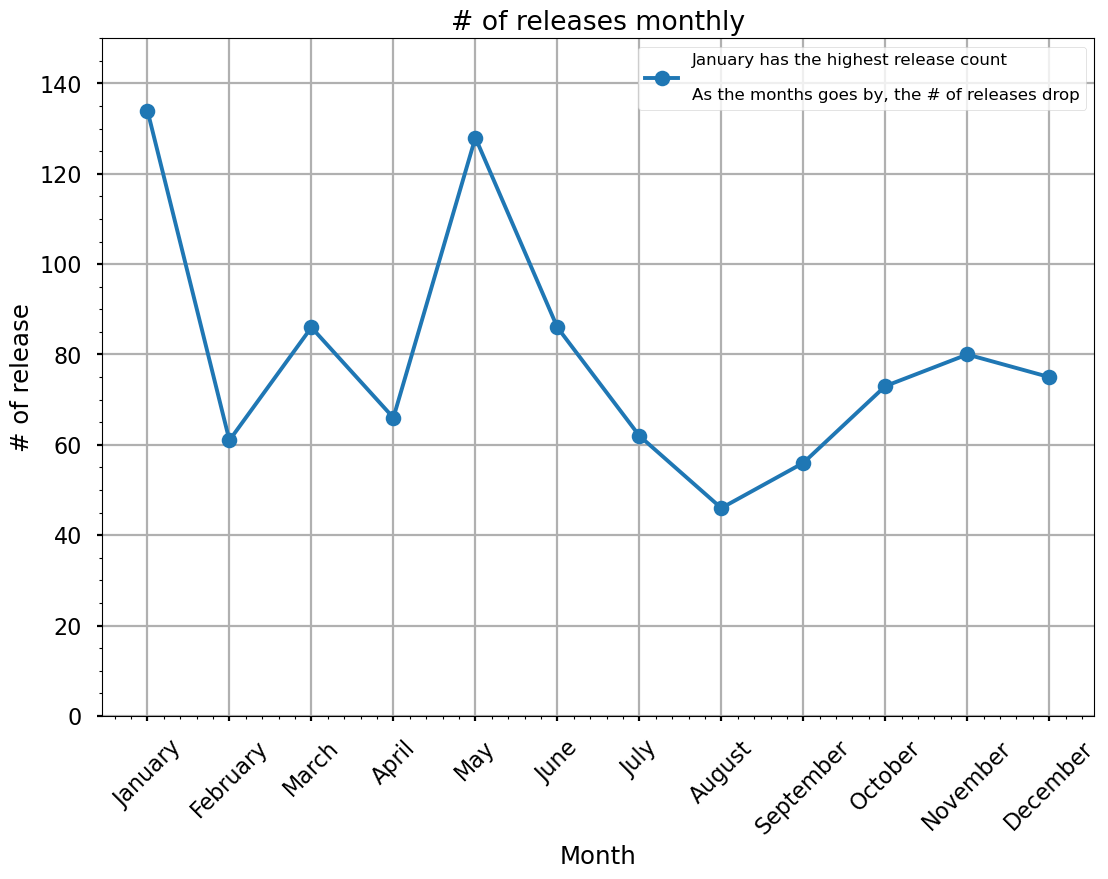

In [156]:
# Get monthly release data using the temptrends function
month, release2 = temptrends(spotify, "released_month")

# Create a dictionary mapping month numbers to their names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

plt.xlabel("Month")
plt.ylabel("# of release")
plt.plot(month, release2, "-o")
plt.ylim(0,150) # Set y-axis limits for better visibility
plt.title('# of releases monthly')
plt.minorticks_on()
plt.xticks(ticks=sorted(set(month)), labels=[month_names[m] for m in sorted(set(month))], rotation=45)
plt.grid()
line_val(month, release2)
plt.show()


#### Question 2:
##### The month with the most release is January or the first month of the year

### Genre and Music Characteristics

In [19]:
# Extract the 'streams' column from the spotifyc DataFrame into a new variable
streamsc_df = spotifyc['streams']

In [20]:
# Create a new DataFrame with selected music characteristics from the spotify DataFrame
mchar_df = pd.DataFrame({
    'bpm': spotify['bpm'],
    'danceability_%': spotify['danceability_%'],
    'valence_%': spotify['valence_%'],
    'energy_%': spotify['energy_%'],
    'acousticness_%': spotify['acousticness_%'],
    'instrumentalness_%': spotify['instrumentalness_%'],
    'liveness_%': spotify['liveness_%'],
    'speechiness_%': spotify['speechiness_%']
})

In [21]:
def corrinterp(val):
    # Check if the input is a valid number between -1 and 1
    if not isinstance(val, (int, float)) or val < -1 or val > 1:
        return "Invalid input: r must be a number between -1 and 1."
        
    # Return correlation interpretation based on the input value
    if val == 1:
        return "Perfect positive correlation"
    elif val == -1:
        return "Perfect negative correlation"
    elif val == 0:
        return "No correlation"
    elif 0 < val < 0.3:
        return "Weak positive correlation"
    elif 0.3 <= val < 0.7:
        return "Moderate positive correlation"
    elif 0.7 <= val < 1:
        return "Strong positive correlation"
    elif -0.3 < val < 0:
        return "Weak negative correlation"
    elif -0.7 < val <= -0.3:
        return "Moderate negative correlation"
    elif -1 < val <= -0.7:
        return "Strong negative correlation"
# Check reference section in the README.md for the references of the values indicated here (-1,1,0,0.3,0.7,-0.3,-0.7).

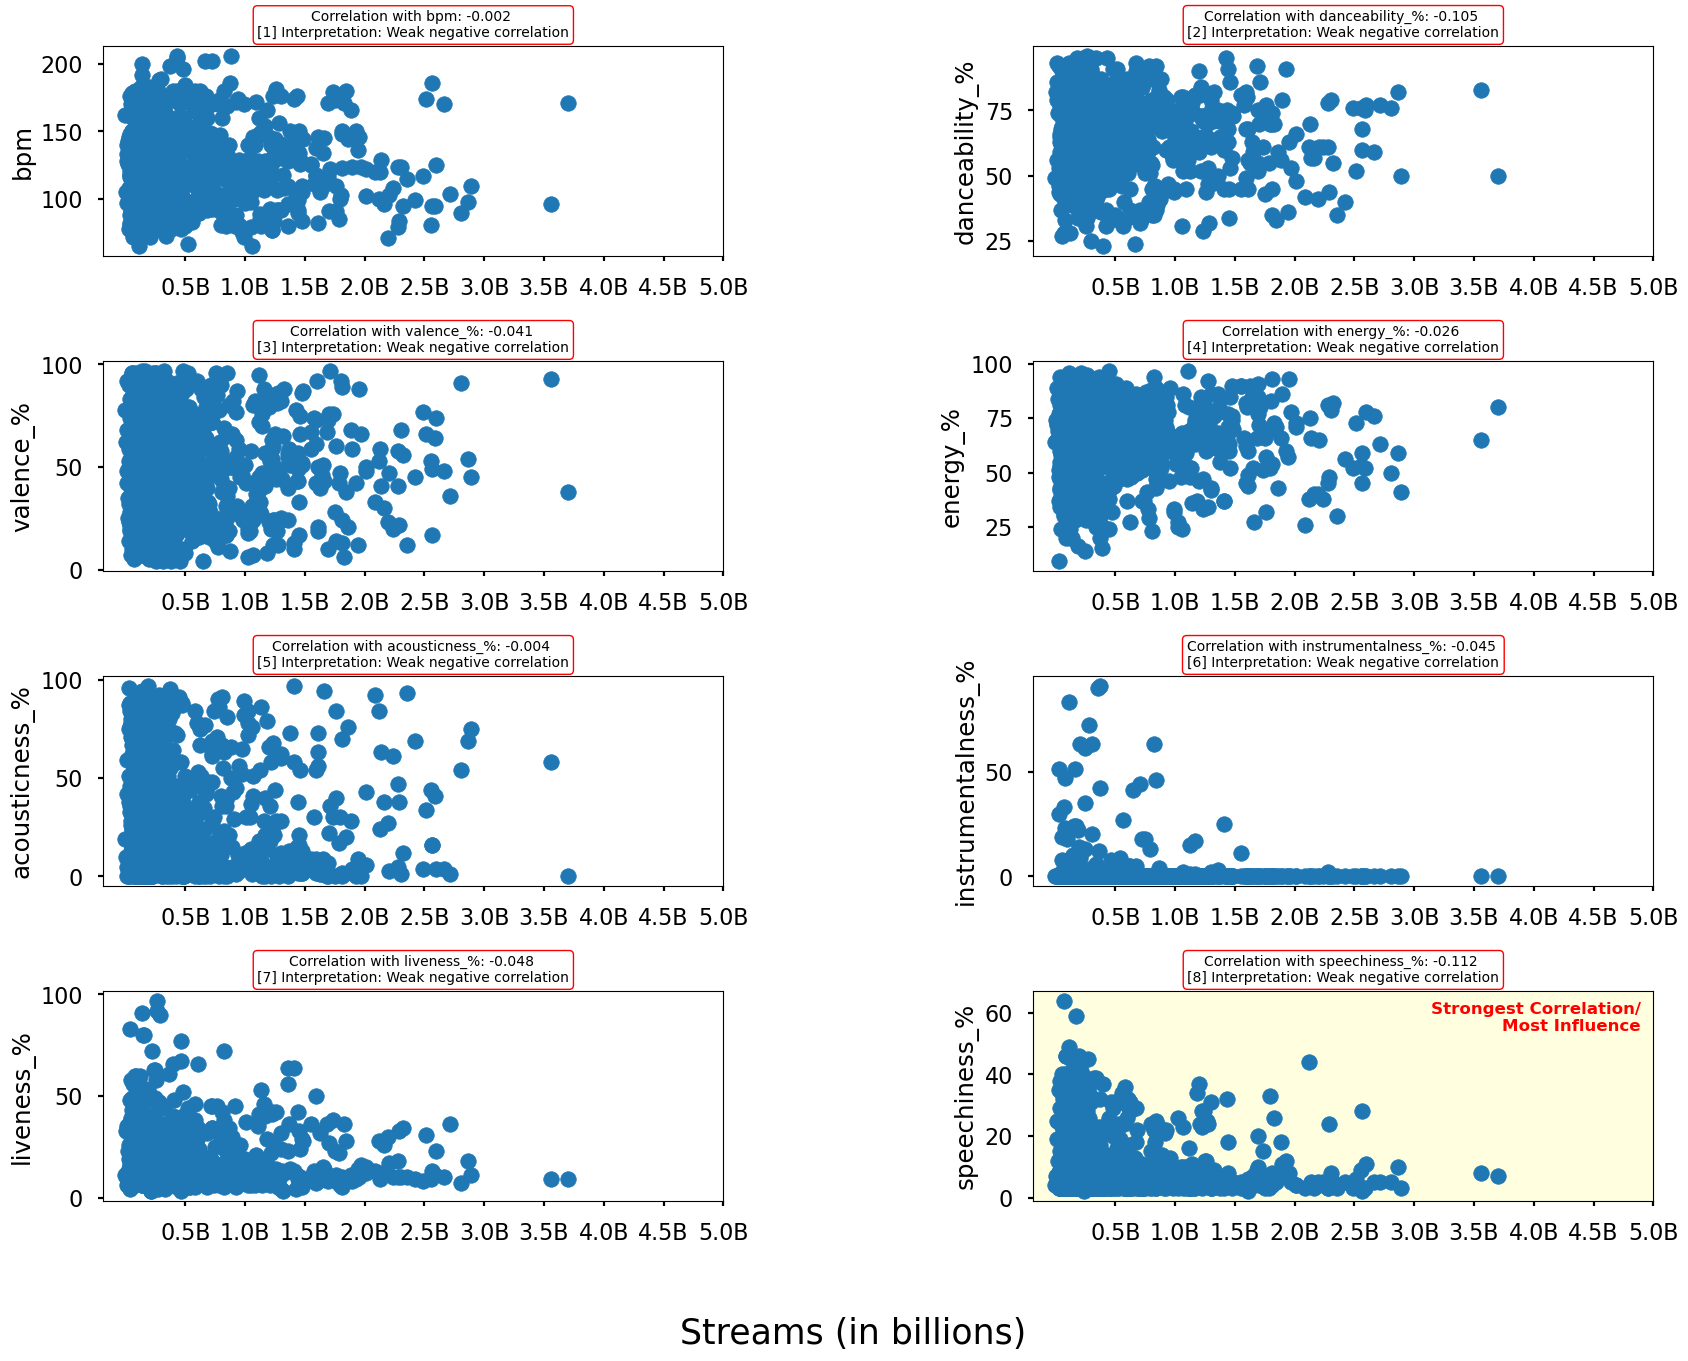

In [22]:
f, a = plt.subplots(nrows = 4, ncols = 2, figsize = (20,15))
# Flatten the array of axes for easy indexing
a = a.flatten()

max_correlation = -np.inf # Initialize variable to track the maximum correlation
max_index = -1            # Initialize variable to track the index of the max correlation

# Loop through each column in the mchar_df DataFrame
for i, col in enumerate(mchar_df.columns):
    
     # Create a scatter plot for each characteristic vs. streams
    a[i].scatter(streamsc_df, mchar_df[col])
    a[i].set_ylabel(col) # Label the y-axis with the characteristic name

    # Adjust x-axis labels to display streams in billions with appropriate formatting
    x_ticks = a[i].get_xticks()+1e9 # Shift x-ticks for billions
    x_labels = [f'{x / 1e9:.1f}B' for x in x_ticks] # Format x-ticks
    a[i].set_xticks(x_ticks)
    a[i].set_xticklabels(x_labels)

    # Calculate the Pearson correlation between streams and the characteristic
    correlation = spotifyc['streams'].corr(mchar_df[col], method = 'pearson')

    # Update max_correlation and max_index if a stronger correlation is found
    if abs(correlation) > max_correlation:
        max_correlation = abs(correlation)
        max_index = i

    # Get the correlation interpretation using the corrinterp function
    interp = corrinterp(correlation)
    
    # Display the correlation and its interpretation as text on the subplot
    a[i].text(0.5, 1.1, f"Correlation with {col}: {correlation:.3f} \n[{i+1}] Interpretation: {interp}",ha = 'center' ,va = 'center', fontsize=10, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round',linewidth = 1), transform=a[i].transAxes)

# Highlight the subplot with the strongest correlation    
if max_index != -1:
    a[max_index].patch.set_facecolor('lightyellow')
    a[max_index].text(0.98, 0.95, f'Strongest Correlation/\nMost Influence', ha='right', va='top', fontsize=12, fontweight='bold', color='red', transform=a[max_index].transAxes)   

f.supxlabel('Streams (in billions)', fontsize = 25, y = 0.01)
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

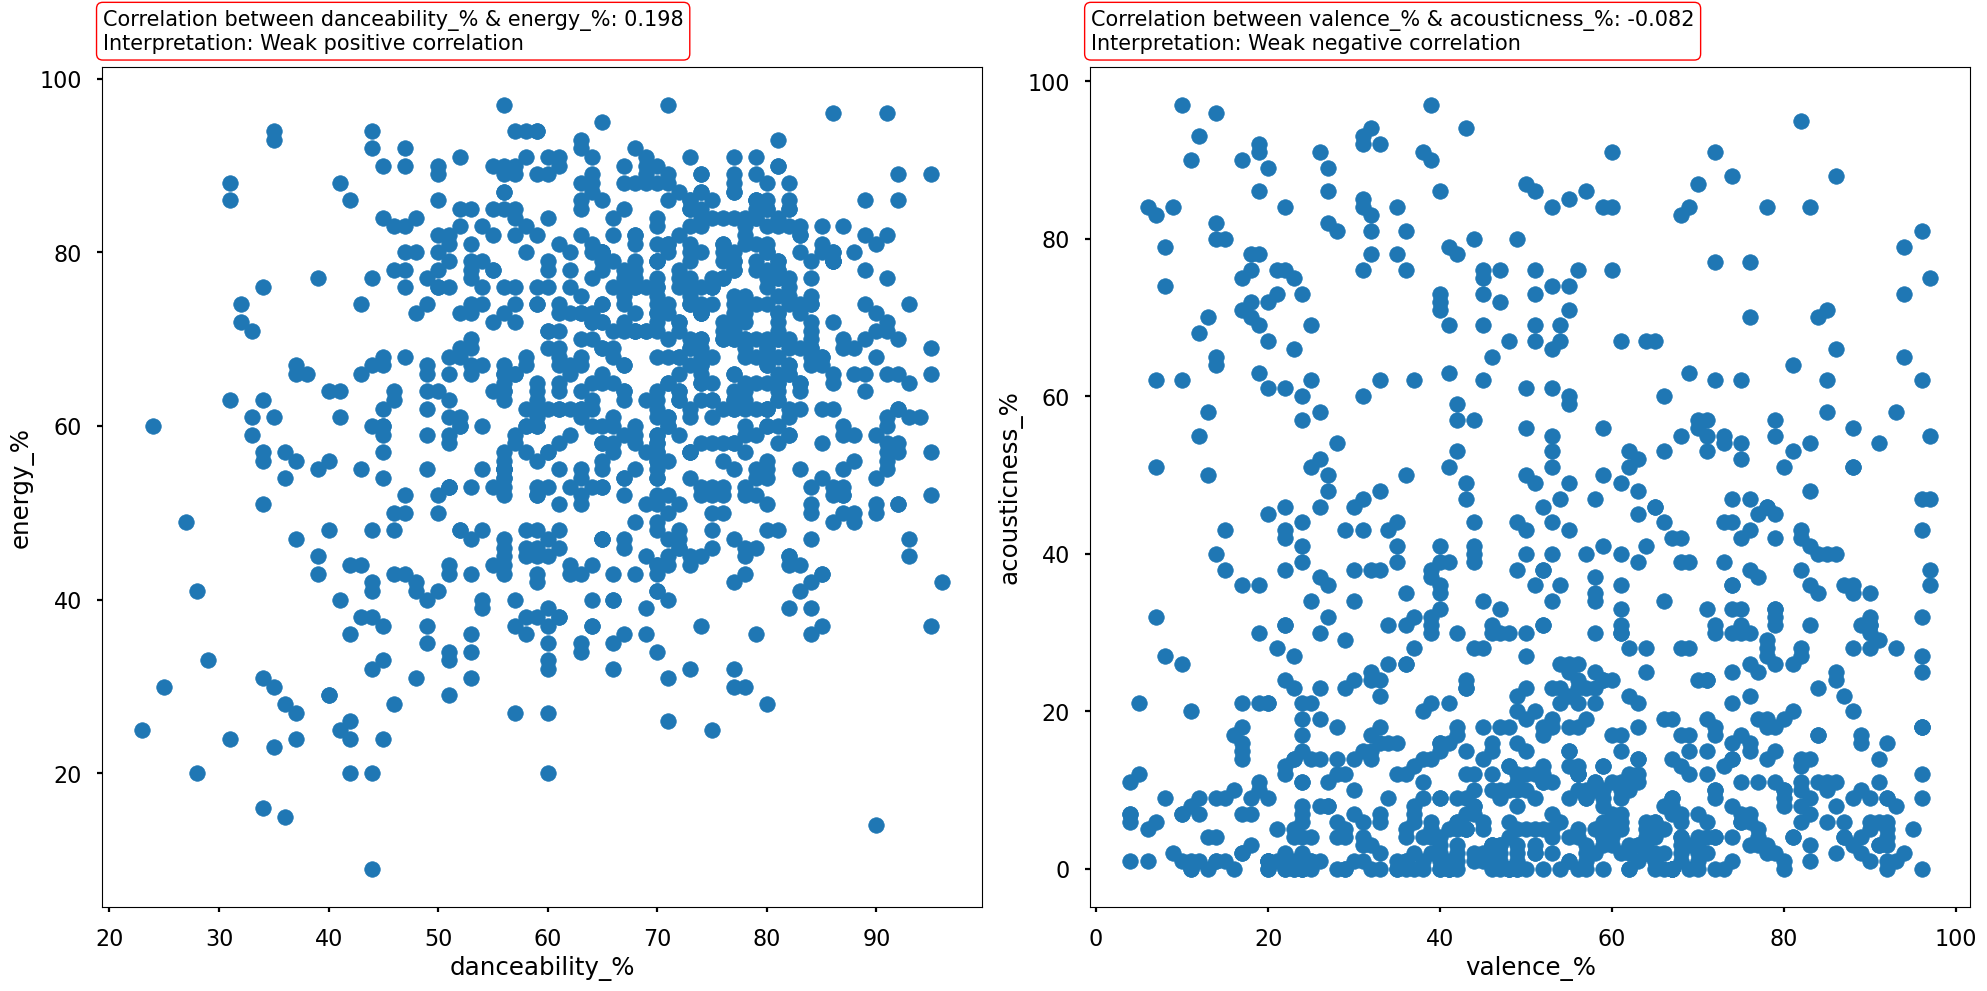

In [23]:
def corr(df, name1, name2, a):
    
    # Create scatter plot of name1 vs. name2 columns
    a.scatter(df[name1], df[name2])
    
    # Calculate the Pearson correlation between the two columns
    mc_corr = df[name1].corr(df[name2], method='pearson')
    
    # Get the correlation interpretation using the 'corrinterp' function
    mc_interp = corrinterp(mc_corr)

    # Set the x and y labels for the plot
    a.set_xlabel(name1)
    a.set_ylabel(name2)
    
    # Add text to display the correlation value and interpretation on the plot
    a.text(0.0005, 1.02, f"Correlation between {name1} & {name2}: {mc_corr:.3f}\nInterpretation: {mc_interp}",fontsize=15, bbox=dict(facecolor='none', edgecolor='red', boxstyle='round',linewidth = 1), transform=a.transAxes)
f, a = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

# Call the corr function to plot the correlation between danceability and energy, and between valence and acousticness
corr(mchar_df, 'danceability_%', 'energy_%', a[0])
corr(mchar_df, 'valence_%', 'acousticness_%', a[1])

# Adjust the layout of the subplots for better spacing
plt.tight_layout()
plt.show()

### Platform Popularity
##### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

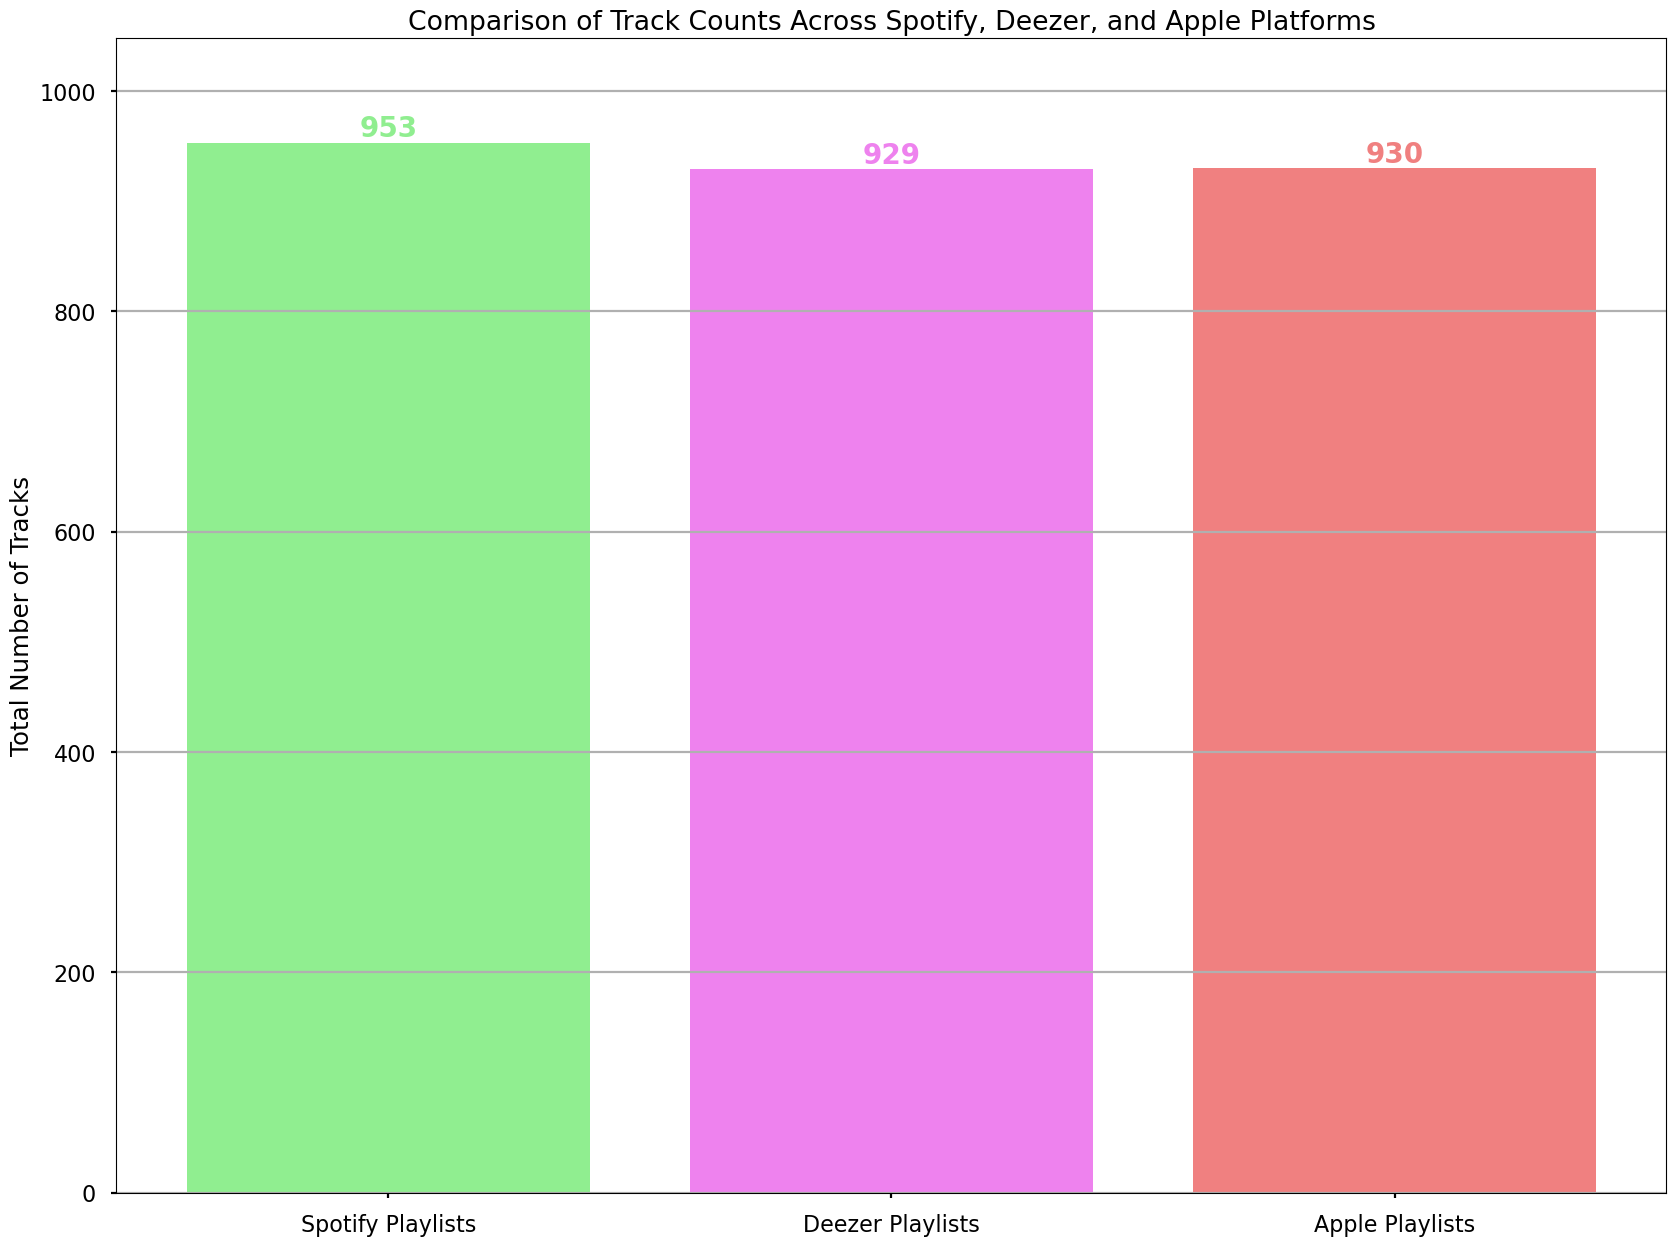

,Platform,Track Count
0,Spotify Playlists,953
1,Deezer Playlists,929
2,Apple Playlists,930


In [144]:

# Convert 'in_deezer_playlists' and 'in_shazam_charts' columns to numeric after removing commas
spotifyc['in_deezer_playlists'] = pd.to_numeric(spotify['in_deezer_playlists'].str.replace(',', ''))
spotifyc['in_shazam_charts'] = pd.to_numeric(spotify['in_shazam_charts'].str.replace(',', ''))

# Filter the DataFrame to only include tracks that are in playlists
spotify_playlists = spotifyc.drop(spotifyc[spotifyc['in_spotify_playlists']==0].index)
deezer_playlists = spotifyc.drop(spotifyc[spotifyc['in_deezer_playlists']==0].index)
apple_playlists = spotifyc.drop(spotifyc[spotifyc['in_apple_playlists']==0].index)

# Count the number of tracks in each platform
spotify_Tcount = spotify_playlists.shape[0]
deezer_Tcount = deezer_playlists.shape[0]
apple_Tcount = apple_playlists.shape[0]

# Create a DataFrame for plotting the counts of tracks across platforms
platform_counts = pd.DataFrame({
    'Platform': ['Spotify Playlists', 'Deezer Playlists', 'Apple Playlists'],
    'Track Count': [spotify_Tcount, deezer_Tcount, apple_Tcount]
})

# Plotting the bar chart
plt.figure(figsize=(20, 15))

# Create the bar plot with custom colors for each platform
bars = plt.bar(platform_counts['Platform'], platform_counts['Track Count'], color=['lightgreen', 'violet', 'lightcoral'])

# Set the title and labels for the chart
plt.title('Comparison of Track Counts Across Spotify, Deezer, and Apple Platforms')
plt.ylabel('Total Number of Tracks')

plt.grid(axis='y') # Add gridlines to the y-axis
plt.ylim(0, platform_counts['Track Count'].max() * 1.1) # Set y-axis limits to make sure there’s enough space for the labels

# Annotate the bars with the actual number of tracks above each bar
for bar in bars:
    yval = bar.get_height()
    # Place the count text above each bar, centered horizontally
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=20, color=bar.get_facecolor(), fontweight='bold')

plt.show()

# Return the platform counts DataFrame for reference
platform_counts

In [26]:
def bar_val(data, xtick_labels):
    # Get the maximum height of the bars
    max_height = max([bar.get_height() for bar in data])  # Get the maximum height
    highest_bar = None  # Variable to store the highest bar
    highest_label = None # Variable to store the label corresponding to the highest bar

    # Loop through each bar and annotate with its value
    for index, bar1 in enumerate(data):
        y_val = bar1.get_height() # Get the height (value) of the bar
        
        # Add the bar value as text above the bar
        plt.text(bar1.get_x() + bar1.get_width() / 2, y_val, f"{y_val:,.2f}", ha='center', va='bottom', fontsize=10, color=bar1.get_facecolor(), fontweight='bold')

        # If this bar is the highest, store it and its corresponding label
        if y_val == max_height:
            highest_bar = bar1
            highest_label = xtick_labels[index]

    # Adding legend only once after identifying the highest bar
    if highest_bar and highest_label:
        plt.legend([highest_bar], [f'{highest_label} favors the most popular tracks'], loc='upper right', prop={'size': 12})

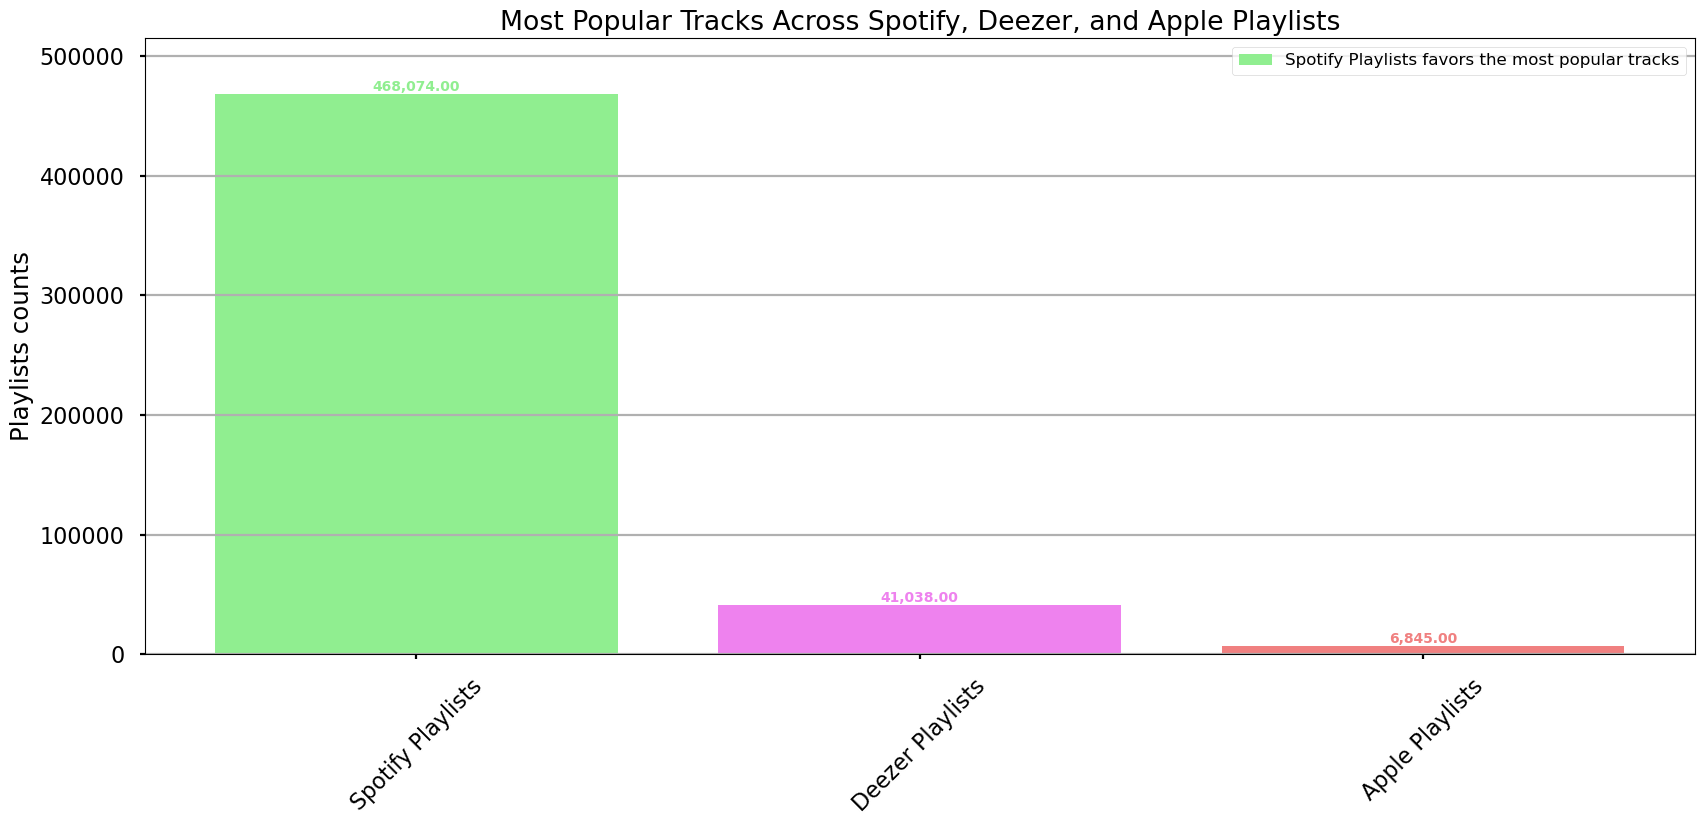

            Platform  Playlist Counts
0  Spotify Playlists           468074
1   Deezer Playlists            41038
2    Apple Playlists             6845
The platform that seems to favor the most popular tracks is: Spotify Playlists


In [34]:
# Get the top 20 tracks based on streams
topstreams = spotifyc.nlargest(20, 'streams')

# Convert Deezer and Shazam playlist counts from string to numeric (handling commas)
topstreams['in_deezer_playlists'] = pd.to_numeric(spotify['in_deezer_playlists'].str.replace(',', ''))
topstreams['in_shazam_charts'] = pd.to_numeric(spotify['in_shazam_charts'].str.replace(',', ''))

# Sum the playlist counts for each platform (Spotify, Deezer, and Apple) for the top 20 tracks
top_platform_counts = {
    'Spotify Playlists': topstreams['in_spotify_playlists'].sum(), # Sum of Spotify playlists for top 20 tracks
    'Deezer Playlists': topstreams['in_deezer_playlists'].sum(),   # Sum of Deezer playlists for top 20 tracks
    'Apple Playlists': topstreams['in_apple_playlists'].sum()      # Sum of Apple playlists for top 20 tracks
}

# Convert the dictionary to a DataFrame for easier plotting
top_platform_counts_df = pd.DataFrame(list(top_platform_counts.items()), columns=['Platform', 'Playlist Counts'])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(20, 8))
bars = ax.bar(top_platform_counts_df['Platform'], top_platform_counts_df['Playlist Counts'], color=['lightgreen', 'violet', 'lightcoral'])
plt.title('Most Popular Tracks Across Spotify, Deezer, and Apple Playlists')
plt.ylabel('Playlists counts')
plt.grid(axis='y')
plt.ylim(0, max(top_platform_counts.values()) * 1.1)
plt.xticks(rotation = 45) # Rotate x-axis labels for better readability

# Call the bar_val function to display values and highlight the max
bar_val(bars, top_platform_counts_df['Platform'])

plt.show()

# Print out the playlist counts for each platform
print(top_platform_counts_df)

# Identify and print the platform that favors the most popular tracks based on playlist counts
most_popular_platform = max(top_platform_counts, key=top_platform_counts.get)
print(f"The platform that seems to favor the most popular tracks is: {most_popular_platform}")

### Advanced Analysis

In [134]:
def arrow(df, ax, ystr, xnd,  txmult, txangle):
    # Set the starting point of the arrow (x = 0, y = first value of df minus ystr offset)
    x_start = 0
    y_start = df.iloc[0]-ystr

    # Set the ending point of the arrow (x = length of df - xnd, y = last value of df)
    x_end = len(df)-xnd
    y_end = df.iloc[-1]

    # Draw an arrow from the starting point to the ending point with red color, arrow style, and low transparency
    ax.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start), arrowprops=dict(edgecolor='red',arrowstyle='->', linewidth=3, alpha = 0.3))

    # Add text annotation near the arrow, indicating a decreasing trend
    # Position text at the midpoint of the arrow, adjusting its location based on txmult and rotating by txangle
    ax.text((x_start + x_end) / 2, (y_start + y_end) / 2*txmult, "Decreasing trend", ha='center', va='center', fontsize=10, color='red',rotation=txangle)


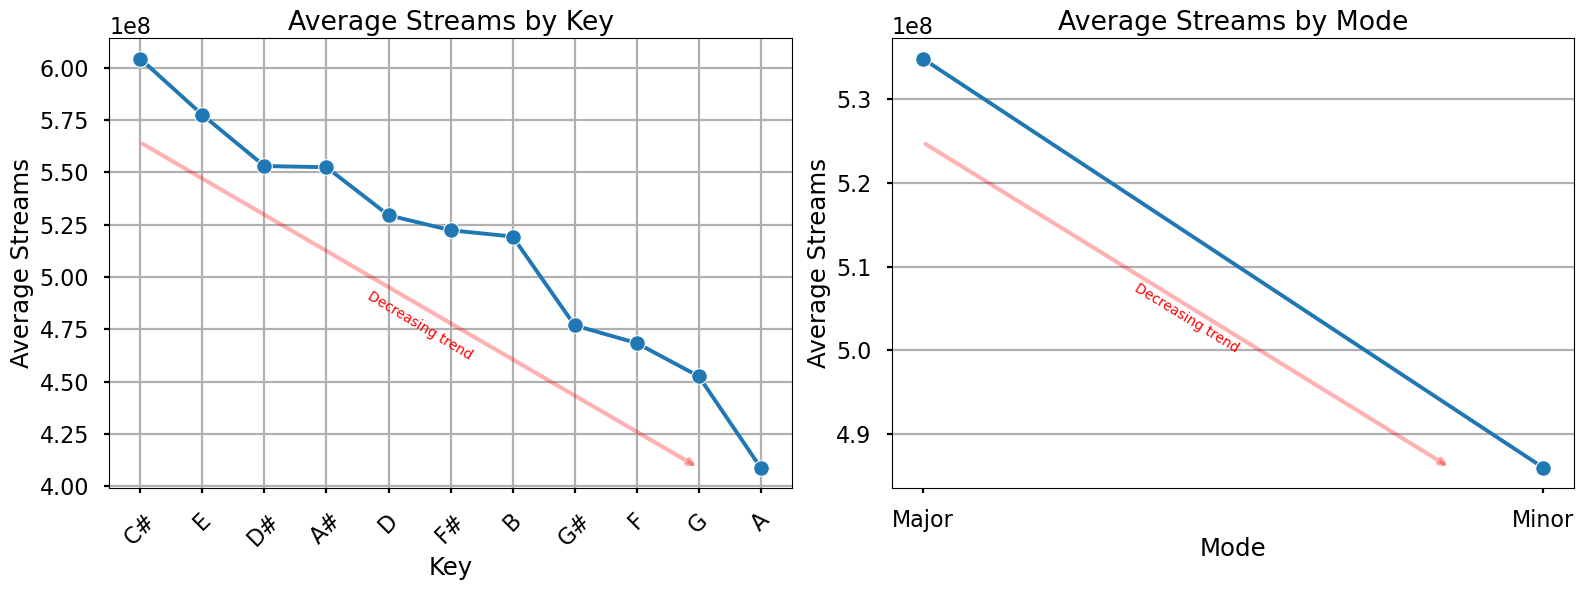

In [136]:
# Group data by 'key' and calculate the average streams per key
by_key = spotifyc.groupby('key')['streams'].mean().sort_values(ascending=False)

# Group data by 'mode' and calculate the average streams per mode
by_mode = spotifyc.groupby('mode')['streams'].mean()


fi, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot stream distribution by key in the first subplot
sns.lineplot(data=by_key, marker='o', ax=ax[0])
ax[0].set_title("Average Streams by Key")
ax[0].set_xlabel("Key")
ax[0].set_ylabel("Average Streams")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Plot average streams by mode in the second subplot
sns.lineplot(data=by_mode, marker='o', ax=ax[1])
ax[1].set_title("Average Streams by Mode")
ax[1].set_xlabel("Mode")
ax[1].set_ylabel("Average Streams")
ax[1].grid(axis = 'y')

# Annotate arrows to indicate trends in both plots
arrow(by_key, ax[0], 4e7, 2,.98, 329) # Add arrow to the first plot (Average Streams by Key)
arrow(by_mode, ax[1], 1e7, 1.15,.997, 328.5) # Add arrow to the second plot (Average Streams by Mode)

# Display the plots
plt.tight_layout()
plt.show()

In [138]:
# List of columns related to playlists and charts for various platforms
playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']

# Group the data by artist(s) name and calculate the sum of playlist/chart counts for each artist
art_names = spotifyc.groupby('artist(s)_name')[playlist_columns].sum()

# Sort the grouped data by 'in_spotify_playlists' in descending order to identify most featured artists on Spotify playlists
pd.DataFrame(art_names).sort_values(by=['in_spotify_playlists'], ascending = False)

# Create new columns for total playlists and total charts for each artist by summing up the respective columns
art_names['Total Playlists'] = art_names['in_spotify_playlists'] + art_names['in_apple_playlists'] + art_names['in_deezer_playlists']
art_names['Total Charts'] = art_names['in_spotify_charts'] + art_names['in_apple_charts'] + art_names['in_deezer_charts'] + art_names['in_shazam_charts']

pd.set_option('display.max_rows', 10)

# Drop the first 7 columns (original playlist and chart counts) to focus on total values
art_names = art_names.drop(art_names.columns[0:7], axis=1)

# Create two DataFrames: one for playlists data and one for chart data
playlist_df = art_names.drop(art_names.columns[-1], axis=1) # Drop the 'Total Charts' column
charts_df = art_names.drop(art_names.columns[0], axis=1) # Drop the 'Total Playlists' column

# Sort the playlist DataFrame by 'Total Playlists' in descending order to identify the most playlisted artists
freq_playlist = playlist_df.sort_values(by = ['Total Playlists'], ascending = False)

# Sort the chart DataFrame by 'Total Charts' in descending order to identify the artists most featured in charts
freq_chart = charts_df.sort_values(by = ['Total Charts'], ascending = False)

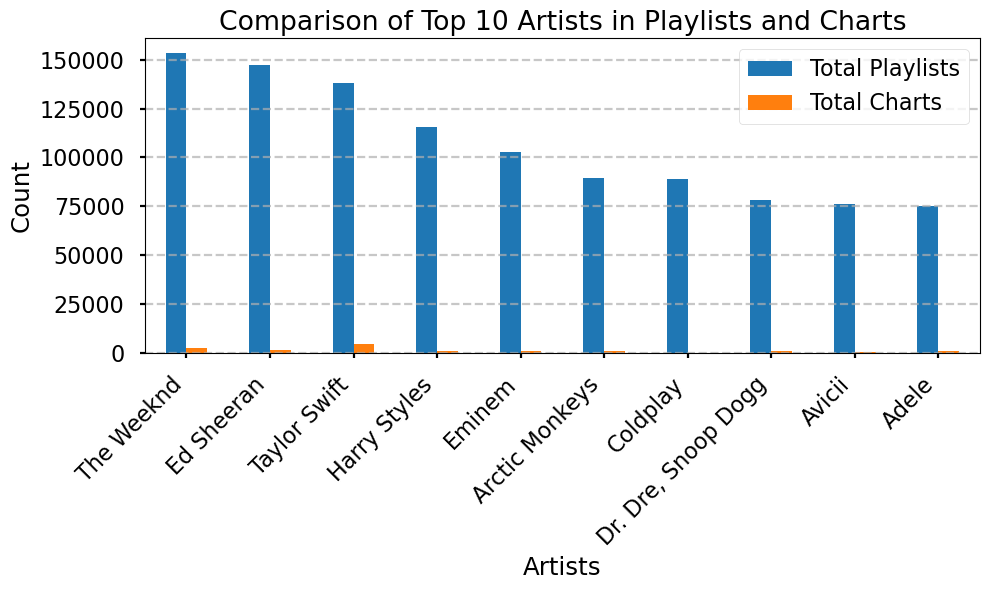

In [140]:
# Extract the top 10 artists based on the 'Total Playlists' values
top_artists = freq_playlist.head(10).index

# Create a new DataFrame for plotting that includes 'Total Playlists' and 'Total Charts' for the top 10 artists
comparison_df = pd.DataFrame({
    'Total Playlists': freq_playlist.loc[top_artists]['Total Playlists'],
    'Total Charts': freq_chart.loc[top_artists]['Total Charts']
})

# Plotting
# Generate a bar plot to compare 'Total Playlists' and 'Total Charts' for the top 10 artists
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Top 10 Artists in Playlists and Charts')
plt.xlabel('Artists')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add gridlines to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [142]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


# SCRATCH CODES

In [ ]:
%%capture
"""
pd.set_option('display.max_rows', 10)
composite_score = (
    spotifyc['in_spotify_charts'] + spotifyc['in_apple_charts'] + spotifyc['in_deezer_charts'] + spotifyc['in_shazam_charts'] +
    spotifyc['in_spotify_playlists'] + spotifyc['in_apple_playlists'] + spotifyc['in_deezer_playlists']
)

# Add the composite_score column to spotifyc
spotifyc['composite_score'] = composite_score

# Sort by composite score and select the top 20 tracks
top_20_tracks = spotifyc.sort_values(by='composite_score', ascending=False).head(20)

# Display the top 20 tracks that represents the relative popularity score that combines presence across multiple platforms
top_20_tracks
topstreams = spotifyc.nlargest(10,'streams')
"""

In [ ]:
%%capture
"""
def plat_popu_ratio(df):
    playlist_ratios = {
        'Spotify': [df['in_spotify_playlists'].mean()],
        'Apple': [df['in_apple_playlists'].mean()],
        'Deezer': [df['in_deezer_playlists'].mean()]
        }

    chart_ratios = {
        'Spotify': [df['in_spotify_charts'].mean()],
        'Apple': [df['in_apple_charts'].mean()],
        'Deezer': [df['in_deezer_charts'].mean()],
        'Shazam': [df['in_shazam_charts'].mean()]
      }


    ratio = pd.DataFrame(playlist_ratios)/pd.DataFrame(chart_ratios).drop(columns=['Shazam'])
    ratio.insert(len(ratio.columns), 'Shazam', chart_ratios['Shazam'][0])
    return ratio
    
def bar_val(data, ax, xtick_labels):
    max_height = max([bar.get_height() for bar in data])  # Get the maximum height
    highest_bar = None
    highest_label = None
    for bar1 in data:
        y_val = bar1.get_height()
        ax.text(bar1.get_x() + bar1.get_width() / 2, y_val, f"{y_val:,.2f}", 
                ha='center', va='bottom', fontsize=10, color=bar1.get_facecolor(), fontweight='bold')
        
        # Highlight the bar with the highest value by adding a border
        if y_val == max_height:
            highest_bar = bar1
            index = data.index(bar1)
            highest_label = xtick_labels[index]
        if highest_bar and highest_label:
            ax.legend([highest_bar], [f'{highest_label} favors the most popular tracks'], loc='upper right', prop={'size': 12})
            
f, a = plt.subplots(1, 2, figsize=(20, 8))
ratio1 = plat_popu_ratio(top_20_tracks)
ratio2 = plat_popu_ratio(topstreams)
plot_pop1 = a[0].bar(ratio1.columns, ratio1.iloc[0], color=['lightgreen', 'lightcoral', 'violet', 'skyblue'])
plot_pop2 = a[1].bar(ratio2.columns, ratio2.iloc[0], color=['lightgreen', 'lightcoral', 'violet', 'skyblue'])

#subplot[0]
a[0].set_title('By Composite Popularity Metric',fontsize = 15)
a[0].set_xticks(range(len(ratio1.columns)))
a[0].set_xticklabels(ratio1.columns, rotation=45)
a[0].grid(axis= 'y')
a[0].set_ylabel('Playlist vs. Chart Presence ratio')

#subplot[1]
a[1].set_title('\n\nPopularity based from Spotify streams Vs. each platforms', fontsize = 15)
a[1].set_xticks(range(len(ratio2.columns)))
a[1].set_xticklabels(ratio2.columns, rotation=45)
a[1].grid(axis= 'y')
a[1].set_ylabel('Playlist vs. Chart Presence ratio')

bar_val(plot_pop1,a[0],ratio1.columns)
bar_val(plot_pop2,a[1],ratio2.columns)
f.suptitle('Which platform seems to favor the most popular tracks?',fontsize = 25)
"""

In [ ]:
%%capture
"""
plt.figure(figsize=(20, 15))
bars = plt.bar(range(len(platforms_df.sum())), platforms_df.sum(), color=['lightgreen', 'violet', 'lightcoral'])
plt.title('Comparison of Track Counts Across Spotify and Apple Platforms')
plt.ylabel('Total Number of Tracks')
plt.xticks(range(len(platforms_df.sum())), platforms_df.columns, rotation = 45)
plt.grid(axis= 'y')

plt.ylim(0, platforms_df.sum().max()*1.1)

lis = [] # debugging purposes
for bar in bars:
    yval = bar.get_height()
    lis.append(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=20, color = bar.get_facecolor(), fontweight = 'bold')
print(f"{platforms_df.sum().max()} {lis}") # debugging purposes
plt.show()
"""

In [ ]:
%%capture
"""
platforms_df = pd.DataFrame({'Spotify Playlists':spotify['in_spotify_playlists'],
                             'Deezer Playlists':spotifyc['in_deezer_playlists'],
                             'Apple Playlists':spotify['in_apple_playlists']})
filtered_df = platforms_df.loc[(platforms_df['Spotify Playlists'] != 0) |
                               (platforms_df['Deezer Playlists'] != 0) |
                               (platforms_df['Apple Playlists'] != 0)]

# Display the filtered DataFrame
Deezer = filtered_df.drop(filtered_df[filtered_df['Deezer Playlists'] == 0].index)
Deezer['Deezer Playlists']
"""

In [ ]:
%%capture
"""
pd.set_option('display.max_rows', 10)
kmpatt_df = pd.DataFrame({'streams':spotifyc['streams'],
                        'key':spotifyc['key'],
                        'mode':spotifyc['mode']})
km_bs = kmpatt_df.sort_values(by=['streams'], ascending = False)
bykey = km_bs.sort_values(by = ['key'])
bymode = km_bs.sort_values(by = ['mode'])
major = bymode[bymode['mode'] == 'Major']
minor = bymode[bymode['mode'] == 'Minor']
"""

In [ ]:
%%capture
"""
favor_df = pd.DataFrame({'Spotify':spotify['in_spotify_playlists'],
                         'Apple':spotify['in_apple_playlists']})
total_tracks_df = platforms_df.drop(axis = 1,columns = ['Spotify Charts'])

pd.set_option('display.max_rows',20)
spotifyc['in_deezer_playlists'] = pd.to_numeric(spotify['in_deezer_playlists'].str.replace(',', ''))
spotifyc['in_shazam_charts'] = pd.to_numeric(spotify['in_shazam_charts'].str.replace(',', ''))
total_tracks_df.insert(0,'Deezer Playlists',spotifyc['in_deezer_playlists'])



charts = spotify['in_spotify_charts'], spotify['in_apple_charts'], spotify['in_deezer_charts'], spotifyc['in_shazam_charts']
total_chart_df = pd.DataFrame()
total_chart_df['Spotify Charts'],total_chart_df['Apple Charts'],total_chart_df['Deezer Charts'],total_chart_df['Shazam Charts'] = charts
tcd = pd.DataFrame(total_chart_df.sum()).transpose()
ttd = pd.DataFrame(total_tracks_df.sum()).transpose()

df = pd.concat([ttd, tcd], sort=False, axis = 1)
df
"""

In [ ]:
spotify['in_spotify_playlists'].max()

In [ ]:
%%capture
"""
outliers1 = outliers(spotify['artist_count'])
outliers_df = pd.DataFrame(outliers1)
bins1 = plt.hist(spotify['artist_count'], bins='auto')[1]
"""

In [ ]:
%%capture
"""
print("Total # of freq. of outliers: "+ str(len(outliers1)))
print("max outlier value: "+ str(outliers1.max()))
print("min outlier value: "+ str(outliers1.min()))
print("Outlier ranges from " + str(outliers1.min()) + " to " + str(outliers1.max()))
f1,a1 = plt.subplots(1,2,figsize = (18,8))
a1[0].hist(spotify['artist_count'], bins = bins1,color = 'cornflowerblue')
a1[0].set_ylabel('Frequency')
a1[0].set_xlabel('Artist Count')
a1[0].set_title('Artist count distribution')

a1[1].hist(spotify['artist_count'],label = 'Artist count distribution', bins = bins1,color = 'cornflowerblue')
a1[1].hist(outliers_df, label = 'Outliers', bins = bins1, color = 'Orange')
a1[1].set_title('w/ Outliers overlayed')
a1[1].set_ylabel('Frequency')
a1[1].set_xlabel('Artist Count')
a1[1].legend()

plt.show()
"""

In [ ]:
%%capture
"""

outliers2 = outliers(spotify['released_year'])
outliers_df2 = pd.DataFrame(outliers2)
min_year = spotify['released_year'].min()
max_year = spotify['released_year'].max()

bins2 = plt.hist(spotify['released_year'], bins='auto')[1]
width = 1
"""

In [ ]:
%%capture
"""
print("Total # of freq. of outliers: "+ str(len(outliers2)))
print("max outlier value: "+ str(outliers2.max()))
print("min outlier value: "+ str(outliers2.min()))
print("Outlier ranges from " + str(outliers2.min()) + " to " + str(outliers2.max()))

f2,a2 = plt.subplots(2,1,figsize = (20,15))

a2[0].hist(spotify['released_year'], bins = bins2,color = 'cornflowerblue',width = width)
a2[0].set_title('Released Year distribution')

a2[1].hist(spotify['released_year'],label = 'Released Year distribution',color = 'cornflowerblue', bins = bins2, width = width)
a2[1].hist(outliers_df2, label = 'Outliers', color = 'Orange', bins = bins2, width = width)
a2[1].set_title('w/ Outliers overlayed')
a2[1].legend()

f2.supylabel('Frequency', fontsize = 25, x = 0.05)
f2.supxlabel('Released Year', fontsize = 25, y = 0.05)

plt.show()
"""

In [ ]:
%%capture
"""
rel_yr = spotify['released_year'].value_counts().sort_values(ascending = False)
art_count = spotify['artist_count'].value_counts().sort_values(ascending = False)
rel_yr.reset_index()#sort_values(by = ['released_year'], ascending = False)
art_count.reset_index()
rel_yr_df = pd.DataFrame(rel_yr.reset_index().sort_values(by = ['released_year'], ascending = False))
rel_yr_df
"""


In [ ]:
%%capture
"""
bpm = spotify['bpm']
d_bility = spotify['danceability_%']
valence = spotify['valence_%']
energy = spotify['energy_%']
acoustic = spotify['acousticness_%']
instrument = spotify['instrumentalness_%']
liveness = spotify['liveness_%']
speech = spotify['speechiness_%']
spotifyc['streams']
"""

In [ ]:
spotify.loc[spotify.index == 574]

In [ ]:
spotifyc.loc[spotifyc.index  == 574]

### v0.6 change logs
#### Overall
- Improved Comments
- Added Advanced Analysis section

#### Platform Popularity
- Revamped track comparison codes
- Revamped favored platform codes

